<a href="https://colab.research.google.com/github/cgpilapanta/gnss/blob/main/TP01_Orbitas_06092024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CÁLCULO DAS COORDENADAS (WGS84) DE UM SATÉLITE GPS PARA UMA DETERMINADA ÉPOCA, EMPREGANDO OS DADOS DO ARQUIVO RINEX DE NAVEGAÇÃO**

---

*   Autor: Christian G. Pilapanta Amagua
*   Data : Setembro de 2024
*   Lotação: Departamento de Geomática - Universidade Federal do Paraná / Laboratorio de Geodésia Espacial e Hidrografia

---

### **A. Objetivo**

Cálcular as coordenadas de um satélite GPS para uma determinada época, através da utilização das informações contidas no arquivo RINEX de Navegação (GPS) da Estação GNSS de Monitoramento Continuo [UFPR 41610M002](https://network.igs.org/UFPR00BRA).

### **B. Dados**

Para esta prática serão utilizados os dados provenientes dos arquivos RINEX de Navegação da Estação GNSS de Monitoramento Continuo [UFPR 41610M002](https://network.igs.org/UFPR00BRA) obtidos no [site oficial do Instituto Brasileiro de Geografía e Estadística - IBGE - Seção Downloads](https://www.ibge.gov.br/geociencias/downloads-geociencias.html).

A data selecionada para este exemplo é o dia 01 de janeiro de 2020.

### **C. Arquivo RINEX**

[RINEX](https://www.igs.org/wg/rinex/) significa "Receiver INdependent EXchange". É um arquivo em formato de texto que visa **armazenar, de forma padronizada**, medidas/observaveis fornecidas pelos receptores GNSS (GPS, GLONASS, EGNOS, WAAS ou Galileo), além de dados meteorológicos e de navegação.

Atualmente existem 2 versões principais do formato RINEX:

1.   [Versão 2.11-A](https://files.igs.org/pub/data/format/Addendum-rinex211.pdf?_gl=1*1w9rv62*_ga*MTEzMTMwNzk3LjE3MjU0OTIxODQ.*_ga_Z5RH7R682C*MTcyNTQ5MjE4NC4xLjEuMTcyNTQ5MjQzOS4xOC4wLjA.&_ga=2.123245896.2133037626.1725492185-113130797.1725492184): Possui informações/observáveis sobre as constelações **GPS, GLONASS e Galileo**, além de dados meteorológicos e de navegação.

2.   [Versão 3.05](https://files.igs.org/pub/data/format/rinex305.pdf?_gl=1*vi7vpe*_ga*MTEzMTMwNzk3LjE3MjU0OTIxODQ.*_ga_Z5RH7R682C*MTcyNTQ5MjE4NC4xLjEuMTcyNTQ5MjQxOC4zOS4wLjA.&_ga=2.123245896.2133037626.1725492185-113130797.1725492184): Possui informações/observáveis sobre as constelações **GPS, GLONASS, Galileo, BeiDou (Compass), QZSS e SBAS**, além de dados meteorológicos e de navegação. A estrutura do registro de dados mudou significativamente devido principalmente aos novos sinais.

Para uma explicação detalhada e **interativa** das diferentes informações contidas em cada arquivo RINEX, recomenda-se visitar o site oficial do [gAGE: Research Group of Astronomy and Geomatics - Seção GNSS Format Descriptions](https://gage.upc.edu/en/learning-materials/library/gnss-format-descriptions) (informação em inglês).

Na presente prática será utilizado o arquivo [RINEX de navegação da constelação GPS - Versão 2.11](https://server.gage.upc.edu/gLAB/HTML/GPS_Navigation_Rinex_v2.11.html) (Imagem demonstrativa na sequência).

<img src=http://iili.io/dkVvkVR.md.png alt="Drawing" style="width: 600px;"/>

---

### **EXEMPLO 01: Cálculo das coordenadas do satélite utilizando os dados do arquivo RINEX de Navegação (GPS)**

### I. Informações necessárias

**I.0. Importação de módulos/bibliotecas Python**

Útil/necessário para rodar de forma correta as diferentes funções/ferramentas matemáticas a serem empregadas no cálculo.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt, atan2, sin, cos, pi

**I.1. Dados de entrada (Elementos Keplerianos + Parâmetros físicos terrestres)**

Em resumo...

$$(a, e, i, \Omega, \omega, \underbrace{T ; t}_{V}) \Longrightarrow\left(x, y, z, v_{x}, v_{y}, v_{z}\right)$$

<center><img src=https://iili.io/dkVgl5P.md.png width="800p"></center>

**Importante**

- O satélite selecionado para este exemplo, foi o satélite GPS PRN 01.
- Neste exercício não serão calculadas as velocidades do satélite ($v_{x}, v_{y}, v_{z}$).
- Para a obtenção dos elementos keplerianos foi utilizado o arquivo RINEX de navegação [ufpr0011.20n](https://ufprbr0.sharepoint.com/:u:/s/2021-2-ga129-a/Ee8vhGpnwUtCtdwDtjGeQewBmpmML1ycfkKFmq9g9Lob-A?e=ra5GfQ) da estação [UFPR 41610M002](https://network.igs.org/UFPR00BRA).


In [ ]:
## ----------- PARÂMETROS FÍSICOS -----------

# Velocidade da luz no vácuo (m/s)
c = 299792458

# WGS-84 Constante gravitacional geocêntrica da Terra (incluindo atmosféra) - GM (m3/s2)
xmu = 3.986004418e14

# WGS-84 Velocidade de rotação da Terra (rad/s)
om_e = 7.2921151467e-5


## ----------- INFORMAÇÕES DA ÉPOCA -----------

# Número (PRN) do satélite (Satellite PRN Number)
SAT = 1

## Época (Epoch)
# Ano, mês, día, hora, minuto, segundo
YY, MM, DD, HH, MM, SS = 20, 1, 1, 2, 0, 0

## Época de referência para as efemérides (TOE: Time Of Ephemeris)
toe = 0.000000000000e+00

# Semana GPS (GPS Week Number to go with TOE)
GPS_Week  = 2.193000000000e+03


## ----------- ELEMENTOS KEPLERIANOS -----------

## 1. Raiz quadrada do semieixo maior (Square root of the orbit semi major axis)
a12 = 5.153671445847e+03

## 2. Excentricidade (Eccentricity)
e = 1.126142579596e-02

## 3. Inclinação na época de referência (Initial Inclination)
xIo = 9.864045952764e-01

## 4. Anomalia média na época de referência (Mo angle)
xMo = -8.592688379390e-02

# 5. Ascenção reta do nodo ascendente (OMEGA Angle)
Omgg = -1.408241833508e+00

# 6. Argumento do perigeo (Omega Angle) IMPORTANTE: Diferente de "OMEGA Angle" no RINEX
Omgp = 8.821663746619e-01


## ----------- VARIAÇÕES/CORREÇÕES DOS ELEMENTOS KEPLERIANOS DEVIDO ÀS PERTURBAÇÕES -----------

## Variação do movimento médio (Delta n)
dn = 4.187317275715e-09

# Variação da ascenção reta do nodo ascendente (OMEGA DOT - Angular velocity)
Omgd = -8.337490147073e-09

# Variação do ângulo de inclinação (Inclination Rate)
xIDOT = -2.800116636097e-10

## Correção da inclinação
# Componente Seno (Inclination Correction Sinus Component)
Cis = 1.620501279831e-07
# Componente Cosseno (Inclination Correction Cosinus Component)
Cic = -9.313225746155e-09

## Correção do raio orbital
# Componente Seno (Radius Correction Sinus Component)
Crs = -7.768750000000e+01
# Componente Cosseno (Radius Correction Cosinus Component)
Crc = 3.635625000000e+02

## Correção do argumento da latitude
## Componente Seno (Latitude Correction Sinus Component)
Cus = 1.383945345879e-06
## Componente Cosseno (Latitude Correction Cosinus Component)
Cuc = -3.956258296967e-06

### II. Sequência de cálculo

**II.0. Cálculo do tempo t em segundos.**

Importante: No arquivo RINEX o ano é estabelecido só com 2 dígitos (98), pelo qual, é necessário obter o ano no formato padrão (1998) antes do cálculo do tempo t em segundos.

In [ ]:
# Transformação do ano a 4 caracteres
if YY < 100:
  if YY < 80:
    YY = YY + 2000
  else:
    YY = YY + 1900

# Cálculo do dia GPS (1980 jan 6.0 => JD=2444244.5 => id_GPS=1.0))
id_GPS = int(365.25 * (YY - 1)) + DD - 722835

# Cálculo do día da semana
idw = id_GPS%7    # % -> função módulo

# Cálculo da semana GPS
nw = (id_GPS - idw)/7

# Cálculo dos segundos da semana
sw = idw * 86400 + SS

# Controle da semana GPS
if nw != GPS_Week:
    print("ERRO no cálculo da semana")
else:
    # Resposta
    print("O tempo t em segundos é:", sw)

O tempo t em segundos é: 0


**II.1. Cálculo do tempo ($t_{k}$) desde a época de referência das efemérides ($t_{o e}$).**

Importante: $t$ e $t_{o e}$ expressos em segundos dentro da semana GPS.

$$t_{k}=t-t_{o e}$$

- Se $t_{k}$ > 302400 seg, subtrair 604800 seg de $t_{k}$.
- Se $t_{k}$ < −302400 seg, adicionar 604800 seg de $t_{k}$.

In [ ]:
# Cálculo do Tempo desde a época da efeméride atual
tk = sw - toe

if tk > 302400:
    tk = tk - 604800
elif tk < -302400:
    tk = tk + 604800

# Controle da idade dos dados orbitais
if tk > 7200:
    print("ADVERTENCIA. tk = " + str(tk) + "> 7200 segundos")

# Resposta
print("O tempo tk em segundos é:", tk)

O tempo tk em segundos é: 0.0


**II.2. Cálculo da anomalia média $M_{k}$ para $t_{k}$.**

$$M_{k}=M_{o}+\left(\frac{\sqrt{\mu}}{\sqrt{a^{3}}}+\Delta n\right) t_{k}$$

In [ ]:
# Cálculo da anomalia média
xMk = xMo + (sqrt(xmu)/(a12**3)+dn)*tk

# Resposta
print("A anomalia média Mk é:", xMk)

A anomalia média Mk é: -0.0859268837939


**II.3. Cálculo da anomalia excêntrica $E_{k}$ (Resolução iterativa da Equação de Kepler).**

Resolução de acordo com [Murison, M. A. (2006). A practical method for solving the Kepler equation. US Naval Observatory, Washington, DC.)](http://alpheratz.net/dynamics/twobody/KeplerIterations_summary.pdf)

$$M_{k}=E_{k}-e \sin E_{k}$$

In [ ]:
# Função para resolver a Equação de Kepler
def KeplerStart3(e, M):
  t34 = e**2
  t35 = e * t34
  t33 = cos(M)

  return M + (-1/2 * t35 + e + (t34 + 3/2 * t33 * t35) * t33) * sin(M)

def eps3(e,M,x):
  t1 = cos(x)
  t2 = -1 + e * t1
  t3 = sin(x)
  t4 = e * t3
  t5 = - x + t4 + M
  t6 = t5 / (1/2 * t5 * t4 / t2 + t2)

  return t5 / ((1/2 * t3 - 1/6 * t1 * t6) * e * t6 + t2)

def KeplerSolve(e, M, tol = 1.0e-14):

  Mnorm = M % (2 * pi)
  E0    = KeplerStart3(e, Mnorm)
  dE    = tol + 1
  count = 0

  while dE > tol:
    E   = E0 - eps3(e, Mnorm, E0);
    dE  = abs(E-E0)
    E0  = E
    count = count + 1
    if count == 100:
      print("Astounding! KeplerSolve failed to converge!")
      break

  return E

# Cálculo da anomalía excéntrica
Ek2 = KeplerSolve(e, xMk)

# Resposta
print("A anomalia excêntrica Ek é:", Ek2)

A anomalia excêntrica Ek é: 6.196280988255456


**II.4. Cálculo da anomalia verdadeira $v_{k}$.**

$$v_{k}=\arctan \left(\frac{\sqrt{1-e^{2}} \sin E_{k}}{\cos E_{k}-e}\right)$$

In [ ]:
# Cálculo da anomalia verdadeira
Fk = atan2(sqrt(1 - e**2) * sin(Ek2), cos(Ek2) - e)

# Resposta
print("A anomalia verdadeira vk é:", Fk)

A anomalia verdadeira vk é: -0.08788729913375518


**II.5. Cálculo do argumento da latitude $u_{k}$ a partir do argumento do perigeu $\omega$, a anomalia verdadeira $v_{k}$ e as correções $c_{u c}$ e $c_{u s}$.**

$$u_{k}=\omega+v_{k}+c_{u c} \cos 2\left(\omega+v_{k}\right)+c_{u s} \sin 2\left(\omega+v_{k}\right)$$

In [ ]:
# Cálculo do argumento da latitude
uk = Omgp + Fk + Cuc * cos(2 * (Omgp + Fk)) + Cus * sin(2 * (Omgp + Fk))

# Resposta
print("O argumento da latitude uk é:", uk)

O argumento da latitude uk é: 0.794280529521861


**II.6. Cálculo da distância radial $r_{k}$, considerando as correções $c_{r c}$ y $c_{r s}$.**

$$r_{k}=a\left(1-e \cos E_{k}\right)+c_{r c} \cos 2\left(\omega+v_{k}\right)+c_{r s} \sin 2\left(\omega+v_{k}\right)$$

In [ ]:
# Cálculo da distância radial
rk = (a12**2) * (1 - e * cos(Ek2)) + Crc * cos(2 * (Omgp + Fk)) + Crs * sin(2 * (Omgp + Fk))

# Resposta
print("A distância radial rk é:", rk)

A distância radial rk é: 26262266.832928564


**II.7. Cálculo da inclinação $i_{k}$ do plano orbital, a partir da inclinação $i_{o}$ na época de referência $t_{o e}$, e as correções $c_{i c}$ e $c_{i s}$.**

$$i_{k}=i_{o}+\dot{i} t_{k}+c_{i c} \cos 2\left(\omega+v_{k}\right)+c_{i s} \sin 2\left(\omega+v_{k}\right)$$

In [ ]:
# Cálculo da inclinação do plano orbital
xIk = xIo + xIDOT * tk + Cic * cos(2 * (Omgp + Fk)) + Cis * sin(2 * (Omgp + Fk))

# Resposta
print("A inclinação ik do plano orbital é:", xIk)

A inclinação ik do plano orbital é: 0.9864047574663778


**II.8. Cálculo da longitude do nodo ascendente $\Omega_{k}$ (em relação a Greenwich) a partir da longitude $\Omega_{o}$ obtida no ínicio da semana GPS.**

Importante:
- Foi corregida a variação da hora sideral aparente em Greenwich entre o início da semana e o tempo de referência $t_{k}=t-t_{o e}$.
- Foi corregida a mudança na longitude do nodo ascendente desde o tempo de referência $t_{o e}$.

$$\Omega_{k}=\Omega_{o}+\left(\dot{\Omega}-\omega_{E}\right) t_{k}-\omega_{E} t_{o e}$$

In [ ]:
# Longitude do nodo ascendente
xlmk = Omgg + (Omgd - om_e) * tk - om_e * toe

# Resposta
print("A longitude do nodo ascendente é:", xlmk)

A longitude do nodo ascendente é: -1.408241833508


**II.9. Cálculo das coordenadas no sistema CTS, aplicando três rotações (ao redor de $u_{k}$, $i_{k}$ e $\Omega_{k}$)**

$$\left[\begin{array}{c}
X_{k} \\
Y_{k} \\
Z_{k}
\end{array}\right]=\mathbf{R}_{3}\left(-\Omega_{k}\right) \mathbf{R}_{1}\left(-i_{k}\right) \mathbf{R}_{3}\left(-u_{k}\right)\left[\begin{array}{c}
r_{k} \\
0 \\
0
\end{array}\right]$$

onde:

$$\begin{aligned}
R_{3}(-\Omega) R_{1}(-i) R_{3}(-u)=\left(\begin{array}{ccc}
\cos \Omega & -\sin \Omega & 0 \\
\sin \Omega & \cos \Omega & 0 \\
0 & 0 & 1
\end{array}\right)\left(\begin{array}{ccc}
1 & 0 & 0 \\
0 & \cos i & -\sin i \\
0 & \sin i & \cos i
\end{array}\right)\left(\begin{array}{ccc}
\cos u & -\sin u & 0 \\
\sin u & \cos u & 0 \\
0 & 0 & 1
\end{array}\right)
\end{aligned}$$

In [ ]:
# Cálculo da posição no plano orbital
xp = rk * cos(uk)
yp = rk * sin(uk)

# Coordenadas no sistema CTS
x = xp * cos(xlmk) - yp * cos(xIk) * sin(xlmk)
y = xp * sin(xlmk) + yp * cos(xIk) * cos(xlmk)
z = yp * sin(xIk)

# Resposta
print("A posição no plano orbital é: XP =", str("{:.6f}".format(xp)), "m e YP =", str("{:.6f}".format(yp)), "m")

A posição no plano orbital é: XP = 18404549.023444 m e YP = 18734439.795403 m


### III. Resultados

**III.1. Coordenadas cartesianas (WGS84) do satélite GPS selecionado no sistema CTS**

In [ ]:
# Resposta
print("As coordenadas do sátelite GPS número", SAT, "no sistema CTS:\n")
print("Coordenada X = ", str("{:.6f}".format(x)).rjust(16), "m")
print("Coordenada Y = ", str("{:.6f}".format(y)).rjust(16), "m")
print("Coordenada Z = ", str("{:.6f}".format(z)).rjust(16), "m")

As coordenadas do sátelite GPS número 1 no sistema CTS:

Coordenada X =   13177971.063358 m
Coordenada Y =  -16489207.941526 m
Coordenada Z =   15625420.292535 m


**III.2. Distância geocêntrica da órbita (Raio da órbita)**

In [ ]:
# Cálculo da magnitude do vetor
raio = (sqrt(x**2 + y**2 + z**2))/1000

#Resposta
print("A distância do satélite GPS número", SAT, "desde o geocêntro é:", str("{:.4f}".format(raio)), "km")

A distância do satélite GPS número 1 desde o geocêntro é: 26540.9766 km


**III.3. Variação da distância geocêntrica da órbita**

**III.3.1. Utilizando o arquivo RINEX de navegação (GPS) [ufpr0011.20n](https://ufprbr0.sharepoint.com/:u:/s/2021-2-ga129-a/Ee8vhGpnwUtCtdwDtjGeQewBmpmML1ycfkKFmq9g9Lob-A?e=ra5GfQ) da estação [UFPR 41610M002](https://network.igs.org/UFPR00BRA).**

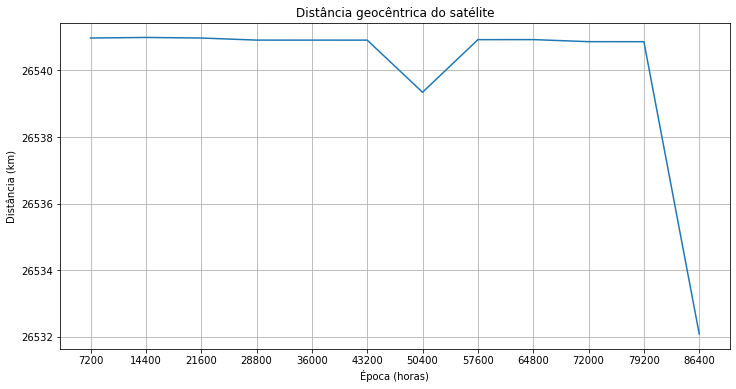

In [ ]:
## Coordenadas cartesianas + raio. Época 01
X01, Y01, Z01 = 9888347.573742, -19617636.877671, -14892694.372604
r01 = (sqrt(X01**2 + Y01**2 + Z01**2))/1000

## Coordenadas cartesianas + raio. Época 02
X02, Y02, Z02 = 9888355.432782, -19617641.576126, -14892711.816896
r02 = (sqrt(X02**2 + Y02**2 + Z02**2))/1000

## Coordenadas cartesianas + raio. Época 03
X03, Y03, Z03 = 9888253.203312, -19617684.944178, -14892693.483931
r03 = (sqrt(X03**2 + Y03**2 + Z03**2))/1000

## Coordenadas cartesianas + raio. Época 04
X04, Y04, Z04 = 9888004.283124, -19617694.270609, -14892734.056377
r04 = (sqrt(X04**2 + Y04**2 + Z04**2))/1000

## Coordenadas cartesianas + raio. Época 05
X05, Y05, Z05 = 9887954.103478, -19617718.493936, -14892734.911876
r05 = (sqrt(X05**2 + Y05**2 + Z05**2))/1000

## Coordenadas cartesianas + raio. Época 06
X06, Y06, Z06 = 9888022.375171, -19617684.395383, -14892734.117946
r06 = (sqrt(X06**2 + Y06**2 + Z06**2))/1000

## Coordenadas cartesianas + raio. Época 07
X07, Y07, Z07 = 9958983.865842, -19659402.248294, -14787271.082219
r07 = (sqrt(X07**2 + Y07**2 + Z07**2))/1000

## Coordenadas cartesianas + raio. Época 08
X08, Y08, Z08 = 9888527.898813, -19617584.756042, -14892554.340552
r08 = (sqrt(X08**2 + Y08**2 + Z08**2))/1000

## Coordenadas cartesianas + raio. Época 09
X09, Y09, Z09 = 9888494.725260, -19617704.349224, -14892422.425824
r09 = (sqrt(X09**2 + Y09**2 + Z09**2))/1000

## Coordenadas cartesianas + raio. Época 10
X10, Y10, Z10 = 9887915.843089, -19617826.717165, -14892534.936879
r10 = (sqrt(X10**2 + Y10**2 + Z10**2))/1000

## Coordenadas cartesianas + raio. Época 11
X11, Y11, Z11 = 9887832.037414, -19617850.006433, -14892557.975984
r11 = (sqrt(X11**2 + Y11**2 + Z11**2))/1000

## Coordenadas cartesianas + raio. Época 12
X12, Y12, Z12 = 10280010.206016, -19848943.832260, -14293074.448742
r12 = (sqrt(X12**2 + Y12**2 + Z12**2))/1000

## Banco de Dados
t = (2*3600, 4*3600, 6*3600, 8*3600, 10*3600, 12*3600, 14*3600, 16*3600, 18*3600, 20*3600, 22*3600, 24*3600)
s = (r01, r02, r03, r04, r05, r06, r07, r08, r09, r10, r11, r12)

# Geração da figura

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(t, s)

ax.set(xlabel='Época (horas)', ylabel='Distância (km)', title='Distância geocêntrica do satélite')
ax.grid()

plt.xticks(t)
plt.show()

**III.3.1. Utilizando o arquivo de Efemérides Precisas [igs20863.sp3](https://ufprbr0.sharepoint.com/:u:/s/2021-2-ga129-a/Eb9ZKr6iUxdBknIaafgAyo8BrtE1JsD1AcVqqzyeT_dV6g?e=lOH5uC) (Para maior informação ver: [CDDIS Data and Products - Orbit Products](https://cddis.nasa.gov/Data_and_Derived_Products/GNSS/orbit_products.html)).**

Para o cálculo da distância geométrica foi utilizada a plataforma [GNSS-Lab Tool (gLAB)](https://gage.upc.edu/en/learning-materials/software-tools/glab-tool-suite)

<center><img src=https://iili.io/dvu1T0P.md.png width="500p"></center>

**III.4. Trajetória da órbita**

Para o cálculo da trejetória orbital foi utilizada a plataforma [GNSS-Lab Tool (gLAB)](https://gage.upc.edu/en/learning-materials/software-tools/glab-tool-suite)

<center><img src=https://i.ibb.co/31JMDkn/p31-tp2.png width="500p"></center>


---

## **EXERCÍCIO PROPOSTO**

**PERGUNTA 1**

**Calcular as coordenadas cartesianas (WGS84) para o satélite GPS PRN03 utilizando o arquivo RINEX de navegação da estação [UFPR 41610M002](https://www.igs.org/imaps/station.php?id=UFPR00BRA) (Ano 2024 - Dia GPS individual por aluno - Ver Tabela em anexo - repositorio).**

**IMPORTANTE: Utilizar as 10 primeiras épocas disponíveis e apresentar as coordenadas cálculadas em uma Tabela.**

**PERGUNTA 2**

Qual é a variação observada na distância geocêntrica da órbita do satélite selecionado? (Calcular a variação relativa $\left(r_{\max }-r_{\min }\right) / r_{\min } \times 100$).


**PERGUNTA 3**

2.1. Calcular o periodo orbital do satélite selecionado (utilizar o semieixo maior $a$).

$$T=2 \pi \sqrt{\frac{a^{3}}{G M}}$$

2.2. O satélite GLONASS orbita a Terra com uma altitude aproximada de 19.100 km. Quál é o seu periodo orbital? (apresentar o cálculo de forma detalhada)

**PERGUNTA 4**

Qual é o impacto do erro da órbita no posicionamento GPS? Para responder isto, existe uma regra prática (não ideal, mas útil) desenvolvida por Baueršíma (1983). Esta estabelece que:

Seja $l$ o comprimento da linha de base (km), $d$ a distância geocêntrica = 25000 (km) e $\Delta X$ o erro da órbita (m); o erro na linha de base $\Delta x$ pode ser calculado através da relação:

$$\Delta x(\mathrm{m}) \approx \frac{l(\mathrm{km})}{25000(\mathrm{km})} \cdot \Delta X(\mathrm{m})$$

Pede-se completar a Tabela:

<center><img src=https://iili.io/dvuhpPj.md.png alt="Drawing" style="width: 500px;"/></center>

**PERGUNTA 5**

Compare os arquivos:

- RINEX de Navegação ([ufpr3600.21n](https://ufprbr0.sharepoint.com/:u:/s/2021-2-ga129-a/EecSOr4DddBLrTk7WnE2lrIBTxIQOlI_HWZXkvFI2aeodA?e=GP4OGS)) (Maior informação sobre o arquivo - [clique aqui](https://gage.upc.edu/sites/default/files/gLAB/HTML/GPS_Navigation_Rinex_v2.11.html))
- Broadcast GPS ([brdc3600.21n](https://ufprbr0.sharepoint.com/:u:/s/2021-2-ga129-a/EdpSw_UNyyBLjH3AiI-WYdoBFEXzmhNoqTmqFP-JBxSxuA?e=gZFhhs)) (Maior informação sobre o arquivo - [clique aqui](https://gage.upc.edu/sites/default/files/gLAB/HTML/GPS_Navigation_Rinex_v2.11.html))
- Efeméride Precisa ([igs21900.sp3](https://ufprbr0.sharepoint.com/:u:/s/2021-2-ga129-a/Efm_7c7BZvlDqQSSWq1c6NYBiKJcMkJv4wiDbrkvT0qS4w?e=UD7NaY)) (Maior informação sobre o arquivo - [clique aqui](https://gage.upc.edu/sites/default/files/gLAB/HTML/SP3_Version_C.html))

5.1. Quál é a diferença principal entre cada arquivo?

5.2. Indique o intervalo de tempo das observações adquiridas pelo satélite em cada um dos arquivos.

5.2. Se vocês realizam um posicionamento de um ponto com intervalo de gravação dos dados igual a 30 segundos e utilizam o arquivo de efemérides precisas SP3 visando obter a informação dos satélites, o que vocês fariam em relação a diferença entre os intervalos de gravação dos dados? Escolha uma opção e justifique sua resposta.

- Passar os dados do posicionamento (30 segundos) ao intervalo das efemérides precisas?
- Passar os dados das órbitas ao intervalo de gravação dos dados no ponto?